# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.



In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


1. Clean the data and perform some EDA and visualization to get to know the data set.

In [5]:
df = pd.read_csv('./data/cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [13]:
# Add column for age of car
df['Age'] = 2025 - df['Make_Year']
print(df.describe())

       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price  \
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02   
mean   488.500000  2016.963115  41571.195697          5.095287  7.410195e+05   
std    281.891232     2.818742  24390.995134          0.446224  3.673234e+05   
min      1.000000  2011.000000   1117.000000          4.000000  1.880000e+05   
25%    244.750000  2015.000000  22676.750000          5.000000  4.757500e+05   
50%    488.500000  2017.000000  37570.500000          5.000000  6.665000e+05   
75%    732.250000  2019.000000  57421.250000          5.000000  8.830000e+05   
max    976.000000  2022.000000  99495.000000          8.000000  2.941000e+06   

              Age  
count  976.000000  
mean     8.036885  
std      2.818742  
min      3.000000  
25%      6.000000  
50%      8.000000  
75%     10.000000  
max     14.000000  


<Axes: >

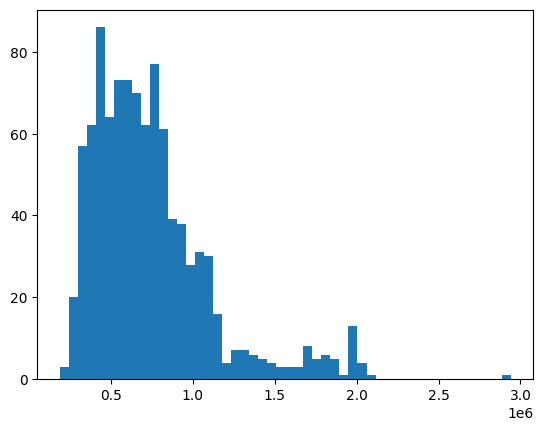

In [ ]:
# Histgram of price
var = 'Price'
df[var].hist(bins = 50, grid = False)

<Axes: >

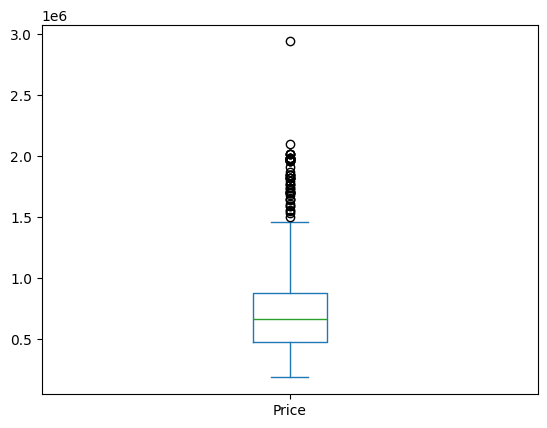

In [16]:
# Boxplot of price
df['Price'].plot.box()

<Axes: xlabel='Age', ylabel='Price'>

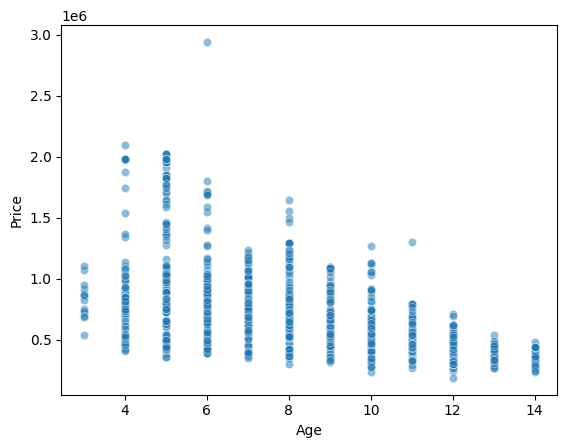

In [27]:
# Scatterplot of age vs price
sns.scatterplot(data = df, x = 'Age', y = 'Price', alpha = 0.5)

<Axes: xlabel='Mileage_Run', ylabel='Price'>

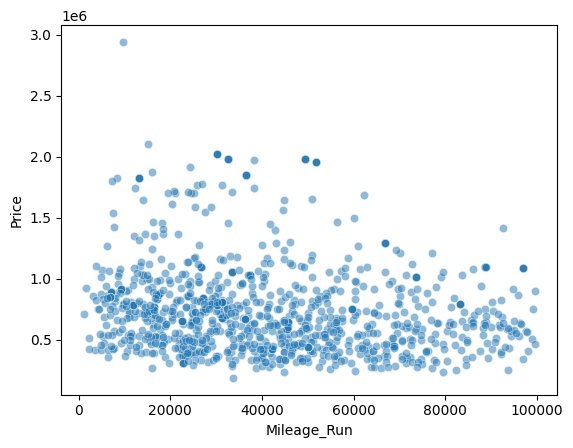

In [28]:
# Scatterplot of mileage vs price
sns.scatterplot(data = df, x = 'Mileage_Run', y = 'Price', alpha = 0.5)

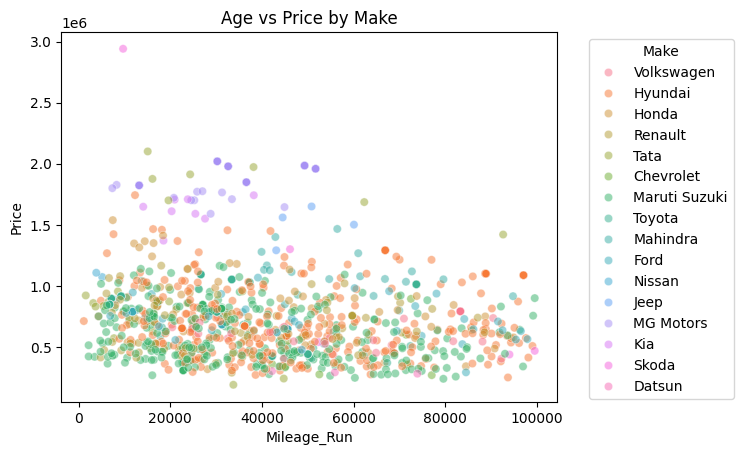

In [26]:
# Scatterplot of age vs price for different makes
sns.scatterplot(data = df, x = 'Mileage_Run', y = 'Price', hue = 'Make', alpha = 0.5)
plt.title('Age vs Price by Make')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.


In [32]:
X_dummies = pd.get_dummies(df[['Make', 'Body_Type', 'Fuel_Type', 'Transmission_Type']], dtype = 'int')
X_dummies.head()

,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,Make_Mahindra,Make_Maruti Suzuki,...,Body_Type_crossover,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_diesel,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_Type_Automatic,Transmission_Type_Manual
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [33]:
X_numeric = df[['Mileage_Run', 'Age', 'Seating_Capacity']]
X_transformed = pd.concat([X_numeric, X_dummies], axis = 1)
X_transformed.head()

,Mileage_Run,Age,Seating_Capacity,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,...,Body_Type_crossover,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_diesel,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_Type_Automatic,Transmission_Type_Manual
0,44611,8,5,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,20305,9,5,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
2,29540,6,5,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,35680,8,5,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,25126,8,5,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1


3. Implement an 80/20 train-test split. Put the test data aside.

In [ ]:
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(780, 29)
(196, 29)


4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [53]:
# Model 1: Numeric features only
X_numeric_train = X_train[X_numeric.columns]
X_numeric_test = X_test[X_numeric.columns]

model_numeric = LinearRegression().fit(X_numeric_train, y_train)
y_train_pred_numeric = model_numeric.predict(X_numeric_train)
y_test_pred_numeric = model_numeric.predict(X_numeric_test)

rmse_train_numeric = np.sqrt(np.mean((y_train - y_train_pred_numeric) ** 2))
rmse_test_numeric = np.sqrt(np.mean((y_test - y_test_pred_numeric) ** 2))
r2_train_numeric = model_numeric.score(X_numeric_train, y_train)
r2_test_numeric = model_numeric.score(X_numeric_test, y_test)

print("Model 1: Numeric features only")
print("Training RMSE:", rmse_train_numeric)
print("Test RMSE:", rmse_test_numeric)
print("Training R^2:", r2_train_numeric)
print("Test R^2:", r2_test_numeric)

Model 1: Numeric features only
Training RMSE: 309338.3729572163
Test RMSE: 284546.9519072174
Training R^2: 0.3144446212602161
Test R^2: 0.29407012364750085


In [54]:
# Model 2: Categorical features only

X_dummies_train = X_train[X_dummies.columns]
X_dummies_test = X_test[X_dummies.columns]

model_dummies = LinearRegression(fit_intercept = False).fit(X_dummies_train, y_train)

y_train_pred_dummies = model_dummies.predict(X_dummies_train)
y_test_pred_dummies = model_dummies.predict(X_dummies_test)

rmse_train_dummies = np.sqrt(np.mean((y_train - y_train_pred_dummies) ** 2))
rmse_test_dummies = np.sqrt(np.mean((y_test - y_test_pred_dummies) ** 2))
r2_train_dummies = model_dummies.score(X_dummies_train, y_train)
r2_test_dummies = model_dummies.score(X_dummies_test, y_test)

print("Model 2: Categorical features only")
print("Training RMSE:", rmse_train_dummies)
print("Test RMSE:", rmse_test_dummies)
print("Training R^2:", r2_train_dummies)
print("Test R^2:", r2_test_dummies)

Model 2: Categorical features only
Training RMSE: 198775.9465839755
Test RMSE: 198842.09806265344
Training R^2: 0.7169242873779107
Test R^2: 0.6552769204966286


In [55]:
# Model 3: All features
model_all = LinearRegression().fit(X_train, y_train)

y_train_pred_all = model_all.predict(X_train)
y_test_pred_all = model_all.predict(X_test)

rmse_train_all = np.sqrt(np.mean((y_train - y_train_pred_all) ** 2))
rmse_test_all = np.sqrt(np.mean((y_test - y_test_pred_all) ** 2))
r2_train_all = model_all.score(X_train, y_train)
r2_test_all = model_all.score(X_test, y_test)

print("Model 3: Numeric + Categorical features")
print("Training RMSE:", rmse_train_all)
print("Test RMSE:", rmse_test_all)
print("Training R^2:", r2_train_all)
print("Test R^2:", r2_test_all)

Model 3: Numeric + Categorical features
Training RMSE: 152388.807877813
Test RMSE: 157123.8419741207
Training R^2: 0.8336276726176153
Test R^2: 0.7847526235540236


5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 

    - Mileage Run and Age: Pretty linear with the exception of a few points that are far from the line. But there are no significant non-linearities. 
    - Seating Capacity: There is no obvious curve in the partial correlation plot but the data do cluster into vertical strips (probably because seating capacity only takes a few discrete values). The overall trend is linear so no significant non-linearities are present.

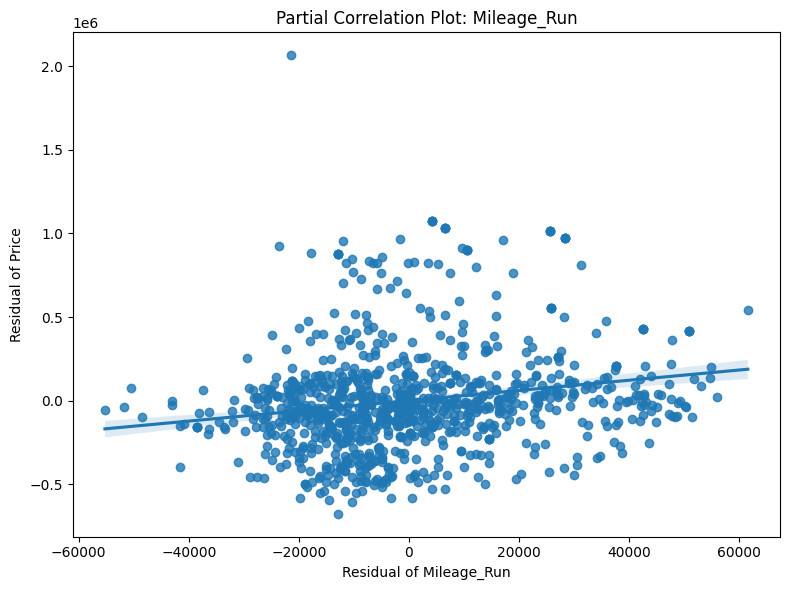

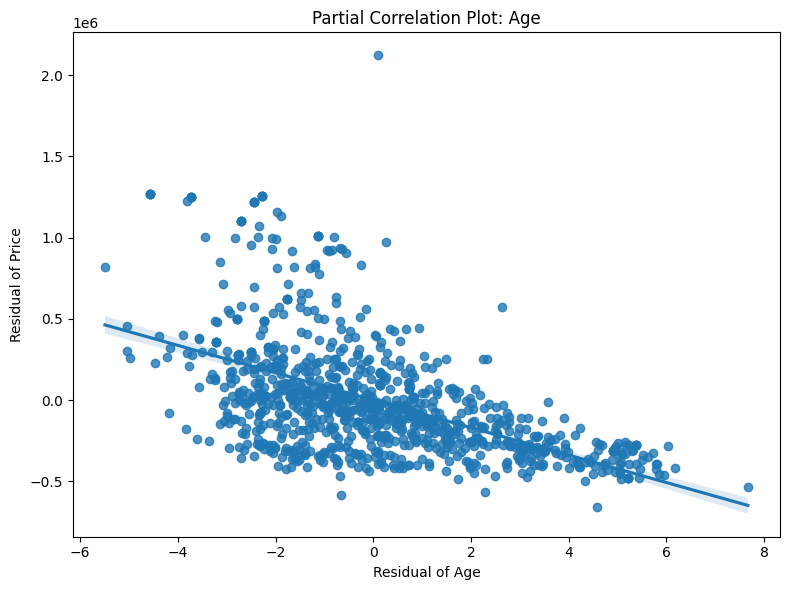

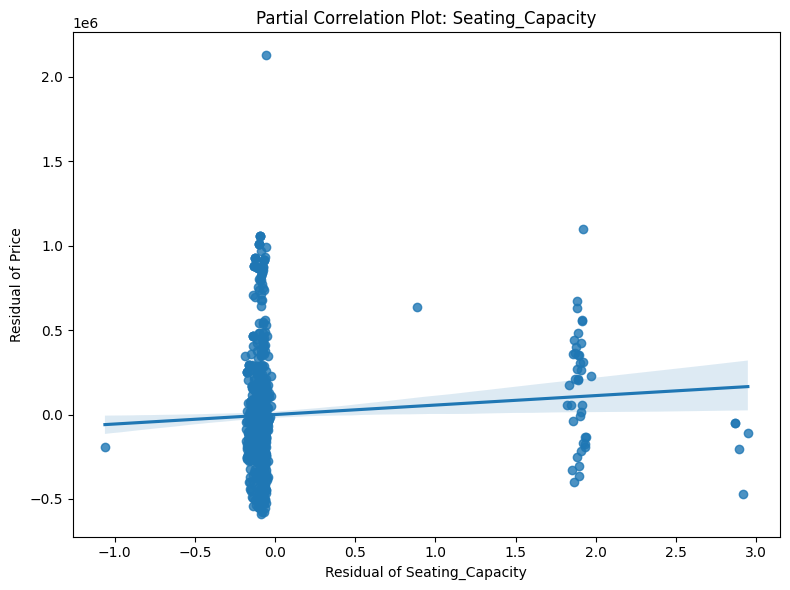

In [61]:
numeric_vars = ['Mileage_Run', 'Age', 'Seating_Capacity']
y = df['Price']

for var in numeric_vars:
    others = [v for v in numeric_vars if v != var]
    if len(others) > 0:
        y_resid = y - LinearRegression().fit(df[others], y).predict(df[others])
    else:
        y_resid = y
    
    x = df[var]
    if len(others) > 0:
        x_resid = x - LinearRegression().fit(df[others], x).predict(df[others])
    else:
        x_resid = x

    plt.figure(figsize=(8, 6))
    sns.regplot(x = x_resid, y = y_resid)
    plt.title(f"Partial Correlation Plot: {var}")
    plt.xlabel(f"Residual of {var}")
    plt.ylabel("Residual of Price")
    plt.tight_layout()
    plt.show()

6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [57]:
X_numeric = df[['Mileage_Run', 'Age', 'Seating_Capacity']]
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_numeric = poly.fit_transform(X_numeric)
poly_feature_names = poly.get_feature_names_out(X_numeric.columns)
X_poly_numeric = pd.DataFrame(X_poly_numeric, columns = poly_feature_names, index = X_numeric.index)
X_poly_numeric.head()

,Mileage_Run,Age,Seating_Capacity,Mileage_Run^2,Mileage_Run Age,Mileage_Run Seating_Capacity,Age^2,Age Seating_Capacity,Seating_Capacity^2
0,44611.0,8.0,5.0,1.990141e+09,356888.0,223055.0,64.0,40.0,25.0
1,20305.0,9.0,5.0,4.122930e+08,182745.0,101525.0,81.0,45.0,25.0
2,29540.0,6.0,5.0,8.726116e+08,177240.0,147700.0,36.0,30.0,25.0
3,35680.0,8.0,5.0,1.273062e+09,285440.0,178400.0,64.0,40.0,25.0
4,25126.0,8.0,5.0,6.313159e+08,201008.0,125630.0,64.0,40.0,25.0


In [58]:
X_dummies = pd.get_dummies(df[['Make', 'Body_Type', 'Fuel_Type', 'Transmission_Type']], dtype = 'int')
X_complex = pd.concat([X_poly_numeric, X_dummies], axis = 1)
X_complex.head()

,Mileage_Run,Age,Seating_Capacity,Mileage_Run^2,Mileage_Run Age,Mileage_Run Seating_Capacity,Age^2,Age Seating_Capacity,Seating_Capacity^2,Make_Chevrolet,...,Body_Type_crossover,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_diesel,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_Type_Automatic,Transmission_Type_Manual
0,44611.0,8.0,5.0,1.990141e+09,356888.0,223055.0,64.0,40.0,25.0,0,...,0,0,0,1,0,1,0,0,1,0
1,20305.0,9.0,5.0,4.122930e+08,182745.0,101525.0,81.0,45.0,25.0,0,...,1,0,0,0,0,0,1,0,0,1
2,29540.0,6.0,5.0,8.726116e+08,177240.0,147700.0,36.0,30.0,25.0,0,...,0,0,0,0,1,0,1,0,0,1
3,35680.0,8.0,5.0,1.273062e+09,285440.0,178400.0,64.0,40.0,25.0,0,...,0,1,0,0,0,0,1,0,0,1
4,25126.0,8.0,5.0,6.313159e+08,201008.0,125630.0,64.0,40.0,25.0,0,...,0,1,0,0,0,0,1,0,0,1


In [59]:
y = df['Price']
X_train_complex, X_test_complex, y_train_complex, y_test_complex = train_test_split(X_complex, y, test_size = 0.2, random_state = 42)

model_complex = LinearRegression().fit(X_train_complex, y_train_complex)
y_train_pred_complex = model_complex.predict(X_train_complex)
y_test_pred_complex = model_complex.predict(X_test_complex)

rmse_train_complex = np.sqrt(np.mean((y_train_complex - y_train_pred_complex) ** 2))
rmse_test_complex = np.sqrt(np.mean((y_test_complex - y_test_pred_complex) ** 2))
r2_train_complex = model_complex.score(X_train_complex, y_train_complex)
r2_test_complex = model_complex.score(X_test_complex, y_test_complex)

print("Complex Model (Polynomial Features + Dummies)")
print("Training RMSE:", rmse_train_complex)
print("Test RMSE:", rmse_test_complex)
print("Training R^2:", r2_train_complex)
print("Test R^2:", r2_test_complex)

Complex Model (Polynomial Features + Dummies)
Training RMSE: 150224.40678604433
Test RMSE: 155560.8206877621
Training R^2: 0.8383201326491044
Test R^2: 0.7890137572328898


7. Summarize your results from 1 to 6. 

- Created an age variable (2025 - Make_Year), histograms of Price showed right-skewed distribution, and scatterplots did not show any significant patterns or relationships.
- Variable transformations: one-hot encoding for categorical variables and combined these dummy variables with the numeric features.
- Split the data into training and test sets using an 80/20 split.
- Simple linear models, I tried 3 models.
   - Model 1 Numeric Only: had a relatively high RMSE and low R^2, indicating that using only the numeric features underfits the data.
   - Model 2 Dummies Only: performed better, lower RMSE and higher R^2, showing the importance of categorical variables in determining price.
   - Model 3 Numeric + Dummies: had the best performance, with the lowest RMSE and highest R^2, showing that both sets of features together are important for predicting price.
- Partial correlation plots showed no significant non-linearities. This means that, after controlling for the other variables, the relationships remain mostly linear. 
- Expanded numeric features using PolynomialFeatures and combined these with the categorical dummies. The complex model produced a slight improvement over Model 3, but nothing significant. This means that while there is some additional predictive power in capturing non-linearities and interactions, the simpler model was already pretty good. 

Have you learned anything about overfitting and underfitting, or model selection?
- Underfitting was apparent in Model 1, which performed poorly, indicating that it was too simple to capture complexities of car pricing.
- Overfitting: Although the complex model performed slightly better, its test performance is very similar to the simpler combined model 3 which indicates that our model is not severely overfitting even after adding interactions and transformations. If there was a large improvement on the training set but a drop in the test set, that could be a sign of overfitting.
- Model selection: Model 3, which used both numeric and categorical features without additional transformations, already provided a strong balance of predictive power and simplicity. The complex model only offered marginal improvements. This showed me the importance of inclusing relevant features and then testing whether adding complexity actually helps. Overall, I learned that a more complex model is not always better.